In [1]:
#Importation of all the neccessary packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import re

In [2]:
# Twitter API credentials
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [3]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [4]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "wizkidayo"
# Number of tweets to pull
tweetCount = 100

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
i = 1
for tweet in results:
   # printing the text stored inside the tweet object
    print (str(i) + ') ' + tweet.text + '\n')
    i = i +1

1) Sigh! God pls help Nigeria

2) #ENDSARS #ENDBADGOVERNANCE #ENDPolicebrutalityinNigeria! 💔💔🇳🇬

3) RT @i_ayanfee: They just shot someone now! God!!! #EndSARS https://t.co/BwEEWNv9RB

4) RT @MrOnos147: Guys, plz NO Comment, just RETWEET let’s make these guys FAMOUS for their act.

Men of the Nigerian Police Force filmed summ…

5) Nigerian government shooting at unarmed civilians!! 💔 https://t.co/dZK3Wd5ZQ5

6) RT @LEEREEKss: Mushin at the moment...
Please retweet aggressively...
#EndSARS #LekkiMassacre #LekkitollgateMassacre #blacktuesday #EndPoli…

7) @MBuhari you are a failure! Old and incompetent! Step down! We don’t want you, your Vice President and your IG! Resign !

8) RT @BBCAfrica: Calls to #EndSARS are not new. Earlier this year, an investigation by #BBCAfricaEye found that SARS officer, Yusuf Kolo tort…

9) Good morning o. #EndSARS!! #EndSARS!! #Endsars!! 🇳🇬💔

10) RT @ajplus: Nigerian protesters are hitting the streets to #EndSARS. They want police reform and an end to police

In [5]:
# creations of dataframe with a cloumn called tweet
df = pd.DataFrame([tweet.text for tweet in results], columns = ['Tweet'])
df.head()

,Tweet
0,Sigh! God pls help Nigeria
1,#ENDSARS #ENDBADGOVERNANCE #ENDPolicebrutality...
2,RT @i_ayanfee: They just shot someone now! God...
3,"RT @MrOnos147: Guys, plz NO Comment, just RETW..."
4,Nigerian government shooting at unarmed civili...


In [6]:
#clean up text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # removing @mentions
    text = re.sub(r'#', '', text) #removing #tag symbols
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlinks
    text = re.sub(r'[^0-9A-Za-z \t]', '', text)
    text = re.sub(r'\w+:\/\/\S+', '', text)
    return text

#cleaning the text
df['Tweet'] = df['Tweet'].apply(cleanTxt)

#Showing the cleaned text
df


,Tweet
0,Sigh God pls help Nigeria
1,ENDSARS ENDBADGOVERNANCE ENDPolicebrutalityinN...
2,ayanfee They just shot someone now God EndSARS
3,Guys plz NO Comment just RETWEET lets make th...
4,Nigerian government shooting at unarmed civili...
...,...
95,01 Maddd Wizkid x Puma MadeinLagos
96,MadeInLagos By Wizkid Is All What That Matter...
97,Wizkid Wizkid performing how did I miss this
98,I want one in every color


In [7]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweet,Subjectivity,Polarity
0,Sigh God pls help Nigeria,0.0,0.0
1,ENDSARS ENDBADGOVERNANCE ENDPolicebrutalityinN...,0.0,0.0
2,ayanfee They just shot someone now God EndSARS,0.0,0.0
3,Guys plz NO Comment just RETWEET lets make th...,1.0,0.5
4,Nigerian government shooting at unarmed civili...,0.0,0.0
...,...,...,...
95,01 Maddd Wizkid x Puma MadeinLagos,0.0,0.0
96,MadeInLagos By Wizkid Is All What That Matter...,0.0,0.0
97,Wizkid Wizkid performing how did I miss this,0.0,0.0
98,I want one in every color,0.0,0.0


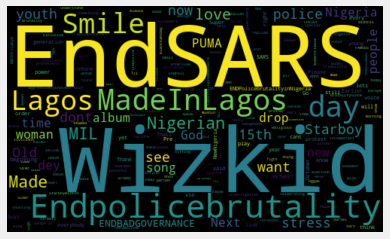

In [8]:
# Plot word cloud

allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500 , height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# Apply the getAnalysis function  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe 
df

,Tweet,Subjectivity,Polarity,Analysis
0,Sigh God pls help Nigeria,0.0,0.0,Neutral
1,ENDSARS ENDBADGOVERNANCE ENDPolicebrutalityinN...,0.0,0.0,Neutral
2,ayanfee They just shot someone now God EndSARS,0.0,0.0,Neutral
3,Guys plz NO Comment just RETWEET lets make th...,1.0,0.5,Positive
4,Nigerian government shooting at unarmed civili...,0.0,0.0,Neutral
...,...,...,...,...
95,01 Maddd Wizkid x Puma MadeinLagos,0.0,0.0,Neutral
96,MadeInLagos By Wizkid Is All What That Matter...,0.0,0.0,Neutral
97,Wizkid Wizkid performing how did I miss this,0.0,0.0,Neutral
98,I want one in every color,0.0,0.0,Neutral


In [10]:
# Print all positive tweets
j = 1
sortedDF = df.sort_values(by='Polarity')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1)  Guys plz NO Comment just RETWEET lets make these guys FAMOUS for their actMen of the Nigerian Police Force filmed summ

2) Good morning o EndSARS EndSARS Endsars 

3) I love this song NewNigeria 

4)  nice one there NewNigeria

5) ENDSARS do the right thing  The youths will listen Endpolicebrutality

6) Next election we show real power EndpolicebrutalityinNigeria

7) Tii Dear young people of Nigeria  Please leave Religious and Tribalistic war for the older generation  Lets love oursel

8) This is not about meYou or any individual  This is for us and the next generation to come Love everybody  

9) Now my people  you see what our voices didthis is the beginning of a new Nigeria Nigerian youths Know your 

10)  old woman see your mates God bless every woman EndSARS 

11)  Weve teamed up with  and wa to do something very special for you our listeners in celebrating

12)  Kalau urusan halhal baik kayak gini nggak pernah bosen deh ingetin kalian untuk dengerin dan nonton MV Smile dari 


In [11]:
# Print all Negative tweets
j = 1
sortedDF = df.sort_values(by= ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1)  you are a failure Old and incompetent Step down We dont want you your Vice President and your IG Resign 

2)  Calls to EndSARS are not new Earlier this year an investigation by BBCAfricaEye found that SARS officer Yusuf Kolo tort

3) Not yet  Mad times  

4) i Next week by this time Ill be vibing to Made in Lagos right   

5) nnadi No stress on repeat everyday  

6)  On this all day long  madeInLagos 

7)  Wizkids albums gan be crazy 



In [12]:
#plot polatrity and Subjectivity

#plt.figure(figsize= (8,6))
#for i in range(0, df.shape[0]):
    #plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
   # plt.title('Sentiment Analysis of @AishaYesufu Twitter handle')
   #plt.xlabel('Polarity')
   # plt.ylabel('Subjectivity')
   #plt.show()

In [13]:
#get percentage positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round(ptweets.shape[0]/df.shape[0]*100, 1)

29.0

In [14]:
#get percentage Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

7.0

In [15]:
#get percentage Neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

64.0

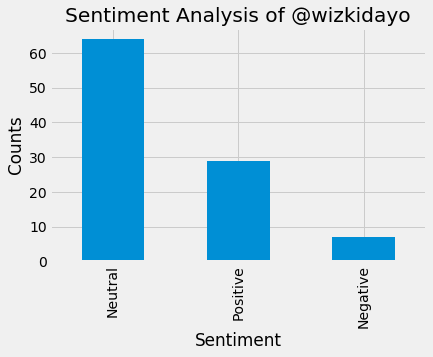

In [17]:
# show value count
df['Analysis'].value_counts

#plot the visual conts
plt.title('Sentiment Analysis of @wizkidayo')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar') 
plt.show()